# Problem Sheet 4

## Clustering of text documents

In this problem sheet we consider clustering algorithms and their application to text data.

## Task (a) (Warm-up): centroid of a set

Let $C$ be a set of vectors $\mathbf{x} \in \mathbb{R}^n$. 

- **Prove** that the vector
$$
\boldsymbol\mu = \frac{1}{|C|} \sum_{\mathbf{x} \in C} \mathbf{x}
$$
(where $|C|$ is the cardinality of $C$) minimises the so-called _centroid_ loss $L(\boldsymbol\mu) := \sum_{\mathbf{x} \in C} \|\mathbf{x}-\boldsymbol\mu\|_2^2$.

## Solution:
Writing $L$ componentwise, assuming $\mathbf{x}=(x_1,\ldots,x_n)$ and $\boldsymbol\mu=(\mu_1,\ldots,\mu_n)$,
$$
L(\boldsymbol\mu) = \sum_{\mathbf{x}\in C} \|\mathbf{x} - \boldsymbol\mu\|_2^2 = \sum_{\mathbf{x}\in C} \sum_{j=1}^n (x_j - \mu_j)^2 = \sum_{j=1}^n \underbrace{\sum_{\mathbf{x}\in C} (x_j - \mu_j)^2}_{L_j(\mu_j)},
$$
we can minimise each component $L_j(\mu_j)$ independently by taking its derivative to zero,
$$
\frac{d L_j}{d \mu_j} = \sum_{\mathbf{x}\in C} \left[2 (x_j - \mu_j)\right] = 2 \sum_{\mathbf{x}\in C} x_j - 2\sum_{\mathbf{x}\in C} \mu_j = 2 \sum_{\mathbf{x}\in C} x_j - 2 |C| \mu_j = 0.
$$
Solving this we get $\mu_{j} = \frac{1}{|C|} \sum_{\mathbf{x}\in C} x_j$ for the elements of the centroid $\boldsymbol\mu = (\mu_{1},\ldots,\mu_{n})$, as requested.

## Task (b): K-means with cosine similarity score

- **Prove** that if $\|\mathbf{x}\|_2=\|\boldsymbol\mu\|_2=1$ $\forall \mathbf{x},\boldsymbol\mu \in \mathbb{R}^n$, then 
$$
\|\mathbf{x} - \boldsymbol\mu\|_2^2 = 2 - 2\cos\angle(\mathbf{x},\boldsymbol\mu).
$$

_Hint: expand $\|\mathbf{x} - \boldsymbol\mu\|_2^2$ using inner products of vectors._

**Remark**: therefore, lower Euclidean distance is equivalent to higher cosine score, and the standard K-means algorithm with Euclidean distance can be used if term-to-document vectors are produced with `TfidfVectorizer`.

## Solution:
$$
\|\mathbf{x} - \boldsymbol\mu\|_2^2 = \langle \mathbf{x} - \boldsymbol\mu, \mathbf{x} - \boldsymbol\mu \rangle = \|\mathbf{x}\|_2^2 - 2 \langle \mathbf{x}, \boldsymbol\mu \rangle + \|\boldsymbol\mu\|_2^2 = 2 - 2\langle \mathbf{x}, \boldsymbol\mu \rangle = 2 - 2 \frac{\langle \mathbf{x}, \boldsymbol\mu \rangle}{\|\mathbf{x}\|_2 \|\boldsymbol\mu\|_2} = 2 - 2\cos\angle(\mathbf{x},\boldsymbol\mu).
$$

## Task (c) (Warm-up): single linkage document clustering
Consider the squared distance function $d(\mathbf{x},\boldsymbol\mu)^2 := 1 - \cos\angle(\mathbf{x},\boldsymbol\mu)$,
and the following term-to-document matrix:
$$
X = \begin{bmatrix}
     1 & 1 & 0 & 0 & 1 \\
     0 & 1 & 1 & 0 & 1 \\
     0 & 0 & 0 & 1 & 1
    \end{bmatrix}.
$$

- **Draw** the clustering dendrogram of the single linkage method applied to $\mathbf{x}_1,\mathbf{x}_2,\mathbf{x}_3$, the rows of $X$.

# Solution:

We start by computing (squared) distances:
$$
d(\mathbf{x}_1,\mathbf{x}_2)^2 = 1 - \frac{2}{\sqrt{3} \cdot \sqrt{3}} = \frac{1}{3}, \qquad d(\mathbf{x}_2,\mathbf{x}_3)^2 = d(\mathbf{x}_1,\mathbf{x}_3)^2 = 1 - \frac{1}{\sqrt{3} \cdot \sqrt{2}} = 1 - \frac{1}{\sqrt{6}} \approx 0.59.
$$
Since the smallest distance is that between $\mathbf{x}_1$ and $\mathbf{x}_2$, we let $C_4 = \{\mathbf{x}_1,\mathbf{x}_2\}$ be our first merging (obviously $C_1 = \{\mathbf{x}_1\}$, $C_2 = \{\mathbf{x}_2\}$, $C_3 = \{\mathbf{x}_3\}$). However, this is also the last step before the root $C_5 = \{C_4, \mathbf{x}_3\} =  \{\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3\}$.

## Task (d): K-means document clustering
Consider the same distance function and term-to-document matrix as in Task (c).

- Trace one iteration of the 2-means algorithm, that is, **compute** the clusters and their total K-means loss for the following options for the fixed centroids:

  - $\boldsymbol\mu_1 = \mathbf{x}_1$, $\boldsymbol\mu_2 = \mathbf{x}_2$,
  - $\boldsymbol\mu_1 = \mathbf{x}_1$, $\boldsymbol\mu_2 = \mathbf{x}_3$.

- Which centroids give the **smallest** K-means loss?

## Solution:

In the first case, clearly $d(\mathbf{x}_1,\boldsymbol\mu_1) = d(\mathbf{x}_2,\boldsymbol\mu_2) = 0$ which is the minimal possible distance, so $\mathbf{x}_1 \in C_1$ and $\mathbf{x}_2 \in C_2$, or, using the label vector $\mathbf{k} = (k_1,k_2,k_3)$, $k_1=1$ and $k_2=2$.
To accommodate $\mathbf{x}_3$, we compute as in Task (c):
$$
d(\mathbf{x}_3,\boldsymbol\mu_1)^2 = d(\mathbf{x}_3,\mathbf{x}_1)^2 = d(\mathbf{x}_3,\boldsymbol\mu_2)^2 = d(\mathbf{x}_3,\mathbf{x}_2)^2 = 1 - \frac{1}{\sqrt{6}},
$$
which are actually equal, and 
$$
L(\mathbf{X},d; C_1,C_2) = 0 + 0 + 1-\frac{1}{\sqrt{6}} \approx 0.59,
$$
no matter if we cluster $\mathbf{k} = (1,2,1)$ or $\mathbf{k} = (1,2,2)$.

In the second case, $d(\mathbf{x}_1,\boldsymbol\mu_1) = d(\mathbf{x}_3,\boldsymbol\mu_2) = 0$, so $k_1 = 1$ and $k_3=2$, but
$$
d(\mathbf{x}_2,\boldsymbol\mu_1)^2 = \frac{1}{3}, \qquad d(\mathbf{x}_2,\boldsymbol\mu_2)^2 = 1 - \frac{1}{\sqrt{6}} \approx 0.59 > \frac{1}{3},
$$
so $k_2 = 1$ unambiguously, and 
$$
L(\mathbf{X},d; C_1,C_2) = 0 + \frac{1}{3} + 0 \approx 0.33
$$
for $\mathbf{k} = (1,1,2)$. This is the optimal clustering. This actually makes sense since $\mathbf{x}_3$ is the only document containing the 4-th term, so it ought to be in a separate cluster.

---

## Task 1 (Warm-up)
**Write** (or borrow) a Python **code** to apply the K-means algorithm (with $K=2$) to the term-to-document matrix in Tasks (c) and (d).

In [5]:
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[1,1,0,0,1], [0,1,1,0,1], [0,0,0,1,1]])
kmeans = KMeans(n_clusters=2)
kvec = kmeans.fit_predict(X)
kvec

array([1, 1, 0])

## Task 2: Information retrieval of Bath Pages

Write a Python code which:
- Loads the Bath website text data from `BathPages.npz`
- Computes its TF $\cdot$ IDF term-to-document matrix with the 2-norm of each row equal 1 as required in Task (b).

In [6]:
import numpy as np
D = np.load('BathPages.npz')
titles = D["titles"]
docs = D["docs"]

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words='english')
X = tv.fit_transform(docs).toarray()

## Task 3: K-means clustering of Bath pages

- **Write** a Python **code** that:
  - varies the number of clusters $K$ from 2 to 7 (inclusive);
  - for each $K$ runs the $K$-means algorithm 10 times to clusterise the rows of the TF $\cdot$ IDF term-to-document matrix from Task 2;
  - for each $K$ and each run of the $K$-means computes and stores the Silhouette Coefficient of the clustering computed in that run;
  - once both loops are complete, finds the clustering with the maximum Silhouette Coefficient among those computed;
  - prints the titles of Bath Pages in each cluster in the maximum-Silhouette clustering.

_Hint: recall the `sklearn.metrics.silhouette_score` function. You can use the `append` method of a `list` to simplify your code within the loops._
  

Cluster 0:
['Choose your postgraduate student accommodation options'
 'Pulteney Court student accommodation' 'Polden student accommodation'
 'Green Park House student accommodation'
 'Thornbank Gardens student accommodation'
 'Centurion House student accommodation'
 'Choose your undergraduate student accommodation options'
 'Woodland Court student accommodation'
 'Canal Wharf student accommodation' 'The Quads student accommodation'
 'Clevelands Building student accommodation' 'Postgraduate Living'
 'Carpenter House student accommodation'
 'Eastwood Terrace student accommodation'
 'Marlborough Court and Solsbury Court student accommodation'
 'Eastwood Green student accommodation']
Cluster 1:
['Osborne House accommodation block' 'Esther Parkin Residence'
 'Central Postgraduate Taught Admissions team'
 'Polden Court accommodation block' '4 West' 'Green Park House'
 'Woodland Court accommodation complex'
 'John Wood Building accommodation block' 'Westwood accommodation complex'
 'Norwood H

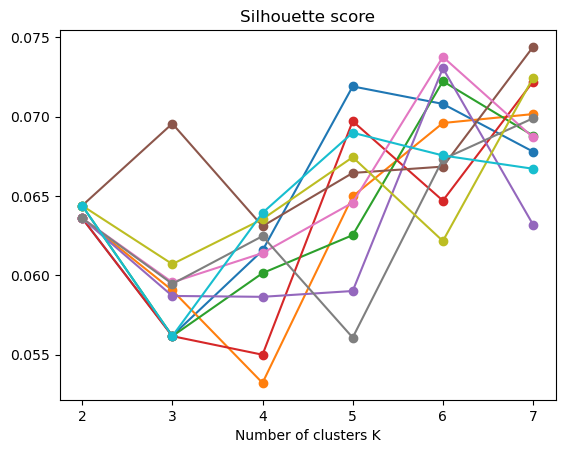

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

nruns = 10
S = []
kvecs = []
for K in range(2,8):
    for i in range(nruns):
        kmeans = KMeans(n_clusters=K)
        kvecs.append(kmeans.fit_predict(X))
        S.append(silhouette_score(X, kvecs[-1]))

S = np.array(S)
imax = np.argmax(S)

for i in range(np.max(kvecs[imax])+1):
    print(f"Cluster {i}:")
    print(titles[kvecs[imax]==i])  

# The below lines are not necessary but helpful for visualisation
print(f"Best silhouette score: {S[imax]} at K={2+imax//nruns}")
from matplotlib import pyplot as plt
plt.plot(range(2,8), S.reshape(-1,nruns), 'o-')
plt.xlabel('Number of clusters K')
plt.title('Silhouette score')
plt.show()